In addition to standard `numpy`, `matplotlib` and `astropy`, need to also install `sklearn` (for `FastICA`), `GPy` and `gpr4im` (for Gaussian processes) using pip.

In [1]:
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
import GPy
from gpr4im import fg_tools as fg
from gpr4im import pk_tools as pk
from gpr4im import obs_tools as obs

In [2]:
#define variables
bins = 20
components = 4
box_len = 100
num_of_freqs = 150
grid_size = 100
FoV = 2.6 #field of view in degrees
start_freq = 50 
freq_step = 1
z_start = 6
num_z = 22
z_step = 1

Generate simualted foregrounds using (https://github.com/chapmanemma/PythonFGSim/blob/main/foreground_sim.py)

In [3]:
import foreground_sim as fs
sim_test = fs.ForeGsim(nfreq=num_of_freqs, numin=start_freq, nustep=freq_step, ngrid=grid_size, imgsize= FoV, nexgal=1477487)

syn_fg = sim_test.gen_sync_map() #generates synchrotron emission foreground map

ff_fg = sim_test.gen_freefree_map() #free-free emission due to bremsstrahllung raditation in diffuse ionised galatic gas

total_fg = syn_fg +ff_fg

['SYN', '@50MHz:', 'DONE!']
['SYN', '@51MHz:', 'DONE!']
['SYN', '@52MHz:', 'DONE!']
['SYN', '@53MHz:', 'DONE!']
['SYN', '@54MHz:', 'DONE!']
['SYN', '@55MHz:', 'DONE!']
['SYN', '@56MHz:', 'DONE!']
['SYN', '@57MHz:', 'DONE!']
['SYN', '@58MHz:', 'DONE!']
['SYN', '@59MHz:', 'DONE!']
['SYN', '@60MHz:', 'DONE!']
['SYN', '@61MHz:', 'DONE!']
['SYN', '@62MHz:', 'DONE!']
['SYN', '@63MHz:', 'DONE!']
['SYN', '@64MHz:', 'DONE!']
['SYN', '@65MHz:', 'DONE!']
['SYN', '@66MHz:', 'DONE!']
['SYN', '@67MHz:', 'DONE!']
['SYN', '@68MHz:', 'DONE!']
['SYN', '@69MHz:', 'DONE!']
['SYN', '@70MHz:', 'DONE!']
['SYN', '@71MHz:', 'DONE!']
['SYN', '@72MHz:', 'DONE!']
['SYN', '@73MHz:', 'DONE!']
['SYN', '@74MHz:', 'DONE!']
['SYN', '@75MHz:', 'DONE!']
['SYN', '@76MHz:', 'DONE!']
['SYN', '@77MHz:', 'DONE!']
['SYN', '@78MHz:', 'DONE!']
['SYN', '@79MHz:', 'DONE!']
['SYN', '@80MHz:', 'DONE!']
['SYN', '@81MHz:', 'DONE!']
['SYN', '@82MHz:', 'DONE!']
['SYN', '@83MHz:', 'DONE!']
['SYN', '@84MHz:', 'DONE!']
['SYN', '@85MHz:', '

['FF', '@198MHz:', 'DONE!']
['FF', '@199MHz:', 'DONE!']


Create the simulated 21cm lightcone using 21cmFast (https://21cmfast.readthedocs.io/en/latest/)

In [4]:
import make_lc_fixed

lc_func = make_lc.lightcone(box_len, grid_size, z_start, num_z, z_step, FoV, start_freq, num_of_freqs, freq_step)
lc, frequency = lc_func.run_code()   

#lightcone needs to be zero meaned and in K (currently in mK) - just necessary because of how the simulation was made
zm_data = np.empty(lc.shape)
for ii in range(0,num_of_freqs):
    mean = np.mean(lc[:,:,ii])
    zm_data[:,:,ii] = lc[:,:,ii] - mean 
_21cm = zm_data/1000

total_data = _21cm + total_fg

 /Users/lukeconaboy/python/21cmFAST-LC/src/py21cmfast/_cfg.py:58: UserWarning:Your configuration file is out of date. Updating...
 /Users/lukeconaboy/python/21cmFAST-LC/src/py21cmfast/_cfg.py:42: UserWarning:Your configuration file is out of date. Updating...
 /Users/lukeconaboy/python/21cmFAST-LC/src/py21cmfast/inputs.py:488: UserWarning:The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX', 'USE_TS_FLUC']
 /Users/lukeconaboy/python/21cmFAST-LC/src/py21cmfast/_utils.py:821: UserWarning:Trying to remove array that isn't yet created: hires_vx
 /Users/lukeconaboy/python/21cmFAST-LC/src/py21cmfast/_utils.py:821: UserWarning:Trying to remove array that isn't yet created: hir

run coeval6


The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX', 'USE_TS_FLUC']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']


run coeval7


The following parameters to FlagOptions are not supported: ['USE_VELS_AUX', 'USE_TS_FLUC']


run coeval8


The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX', 'USE_TS_FLUC']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']


run coeval9


The following parameters to FlagOptions are not supported: ['USE_VELS_AUX', 'USE_TS_FLUC']


run coeval10


The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX', 'USE_TS_FLUC']


run coeval11


The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX', 'USE_TS_FLUC']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']


run coeval12


The following parameters to FlagOptions are not supported: ['USE_VELS_AUX', 'USE_TS_FLUC']


run coeval13


The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX', 'USE_TS_FLUC']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']


run coeval14


The following parameters to FlagOptions are not supported: ['USE_VELS_AUX', 'USE_TS_FLUC']


run coeval15


The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX', 'USE_TS_FLUC']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']


run coeval16


The following parameters to FlagOptions are not supported: ['USE_VELS_AUX', 'USE_TS_FLUC']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']


run coeval17


The following parameters to FlagOptions are not supported: ['USE_VELS_AUX', 'USE_TS_FLUC']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']


run coeval18


The following parameters to FlagOptions are not supported: ['USE_VELS_AUX', 'USE_TS_FLUC']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']


run coeval19


The following parameters to FlagOptions are not supported: ['USE_VELS_AUX', 'USE_TS_FLUC']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']


run coeval20


The following parameters to FlagOptions are not supported: ['USE_VELS_AUX', 'USE_TS_FLUC']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']


run coeval21


The following parameters to FlagOptions are not supported: ['USE_VELS_AUX', 'USE_TS_FLUC']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']


run coeval22


The following parameters to FlagOptions are not supported: ['USE_VELS_AUX', 'USE_TS_FLUC']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']


run coeval23


The following parameters to FlagOptions are not supported: ['USE_VELS_AUX', 'USE_TS_FLUC']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']


run coeval24


The following parameters to FlagOptions are not supported: ['USE_VELS_AUX', 'USE_TS_FLUC']
The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']


run coeval25


The following parameters to FlagOptions are not supported: ['USE_VELS_AUX', 'USE_TS_FLUC']


run coeval26


The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']


run coeval27
27.4
26.84313725490196
found box!
new cell num: 100, cell diff: 0, cell diff max: 100
26.307692307692307
25.79245283018868
found box!
new cell num: 99, cell diff: 0, cell diff max: 99
25.296296296296298
24.818181818181817
found box!
new cell num: 99, cell diff: 0, cell diff max: 99
24.357142857142858
23.912280701754387
found box!
new cell num: 98, cell diff: 1, cell diff max: 99
23.482758620689655
23.06779661016949
found box!
new cell num: 97, cell diff: 2, cell diff max: 99
22.666666666666668
22.278688524590162
21.903225806451612
found box!
new cell num: 97, cell diff: 2, cell diff max: 99
21.53968253968254
21.1875
found box!
new cell num: 96, cell diff: 2, cell diff max: 98
20.846153846153847
found box!
new cell num: 96, cell diff: 2, cell diff max: 98
20.515151515151516
20.19402985074627
found box!
new cell num: 95, cell diff: 2, cell diff max: 97
19.88235294117647
found box!
new cell num: 95, cell diff: 2, cell diff max: 97
19.579710144927535
19.285714285714285
19.0
fo

Using FastICA as a foreground removal technique using https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html

To use FastICA the data must be in the form (x,y) where x is all the image pixels in one long continous array of all the pixels and y is an array of all the frequencies for each slice

In [5]:
reshape_data = total_data.reshape((grid_size*grid_size,num_of_freqs))

 /Users/lukeconaboy/miniforge3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning:Starting in v1.3, whiten='unit-variance' will be used by default.


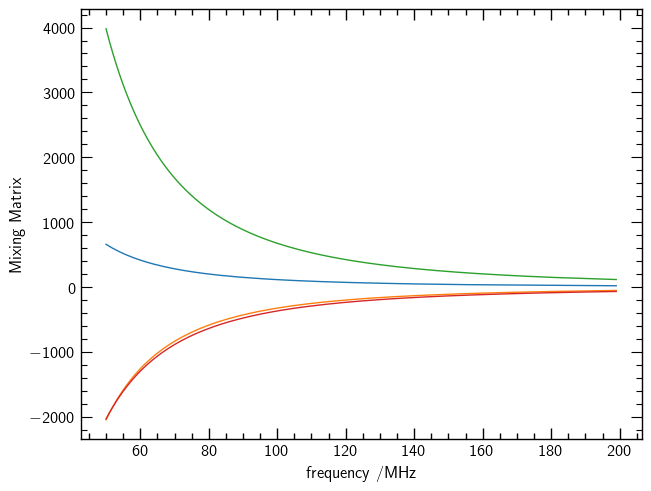

In [6]:
#initilise FastICA class with 4 components
f_ica = FastICA(n_components=4)
#generate the 4 componets
S = f_ica.fit_transform(reshape_data)

#get mixing matrix
A = f_ica.mixing_

#plot mixing matrix
plt.plot(frequency , A)
plt.xlabel('frequency /MHz')
plt.ylabel('Mixing Matrix')
plt.show()




If FastICA has manage to model all of the variation in the data then it should be able to recreate the data from the matrix multiplication of the mixing matrix and the FastICA components. For example if A is the Mixing matrix and S is the array of components then: image = AS

For foreground removal we assume AS models the foregrounds so then residuals should be the 21cm signal and any noise/telescope effects: image = AS + noise + 21cm 

In [7]:
#create reconstructed fg

model_fICA = (np.matmul(A,S.T).T).reshape((grid_size,grid_size,num_of_freqs))

#create residuals
resids_fICA = total_data - model_fICA #residuals 

The residuals (plotted below and on the right) should be the same as the 21cm signal plus any noise present (if the foreground removal has worked correctly. The colourbars show temperature in K

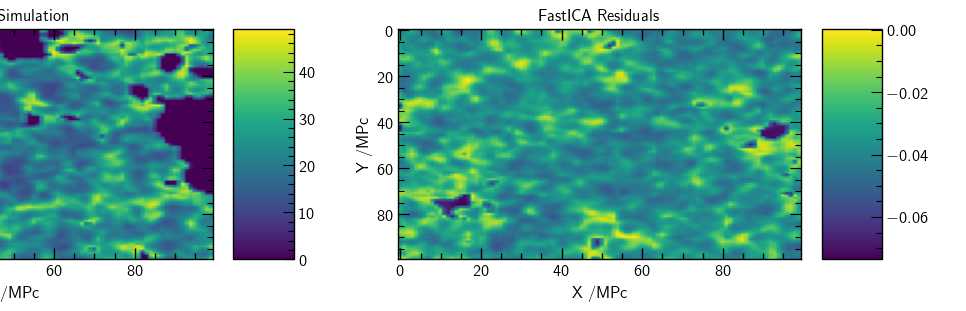

In [8]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(1,2,1)
im = ax.imshow(lc[:,:,90])
ax.set_xlabel('X /MPc')
ax.set_ylabel('Y /MPc')
ax.set_title('21cm Simulation')
fig.colorbar(im, ax=ax)
clim = im.properties()['clim']
ax = fig.add_subplot(1,2,2)
im = ax.imshow(resids_fICA[:,:,50])
ax.set_xlabel('X /MPc')
ax.set_ylabel('Y /MPc')
ax.set_title(' FastICA Residuals')
fig.colorbar(im, ax=ax)




The model (shown below and on the right) should be the same as the foregrounds

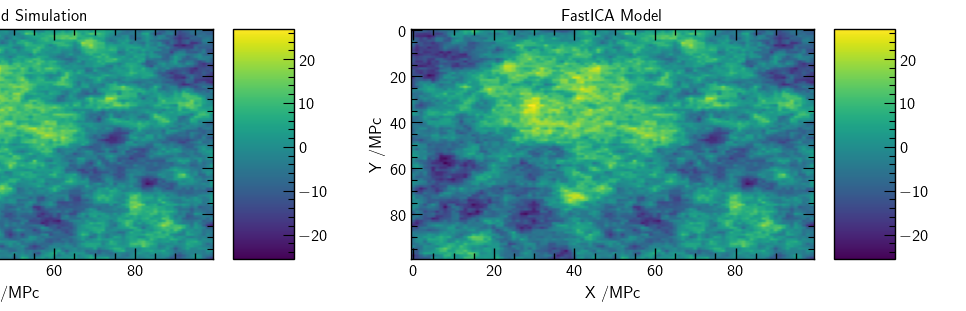

In [9]:
fig = plt.figure(figsize=(12,3))
ax=fig.add_subplot(1,2,1)
im = ax.imshow(total_fg[:,:,50])
ax.set_xlabel('X /MPc')
ax.set_ylabel('Y /MPc')
ax.set_title(' Foreground Simulation')
fig.colorbar(im, ax=ax)
clim = im.properties()['clim']
ax = fig.add_subplot(1,2,2)
im = ax.imshow(model_fICA[:,:,50],clim=clim)
ax.set_xlabel('X /MPc')
ax.set_ylabel('Y /MPc')
ax.set_title('FastICA Model')
fig.colorbar(im, ax=ax)
plt.show()

Foreground removal using Gaussian Process Regression techniques (https://github.com/paulassoares/gpr4im)

For GPR I had to use kernels to model the different effects, I have used the ones outlined in Hothi et al 2020 (https://arxiv.org/abs/2011.01284) and Mertens et al 2020 https://ui.adsabs.harvard.edu/abs/2020MNRAS.493.1662M/abstract)

For the 21cm signal they used a exponetial kernel, for the foregrounds they used a gaussian kernel (to model the smooth foregrounds) plus a matern 3/2 kenrel plus a matern 5/2 kernel, for the noise from the telescope they used a white kernel,

I haven't added anay telescope effects to this simulated data so I haven't included the white kernel here but I presume we would need to for the data challenge

GPRclean input has to be in the shape (images, frequency) with the images as a 2D array, it doesn't work if the file is in the shape (frequency, images)

In [10]:
#choose kernel
# kernel for the smooth foreground:
kern_sfg = GPy.kern.RBF(1)
#mixing kernel
kern_mix = GPy.kern.Matern32(1)
#ex kernel
kern_ex = GPy.kern.Matern52(1)
# kernel for the HI cosmological signal:
kern_21 = GPy.kern.Exponential(1)
#set lengthscales to ensure the kernals fit to the correcrt part of the signal based on the data in Mertens et al 2020

kern_sfg.lengthscale.constrain_bounded(10,100)
kern_21.lengthscale.constrain_bounded(0.1,1.2)
kern_mix.lengthscale.constrain_bounded(1,10)
kern_ex.lengthscale.constrain_bounded(0.2,8)
kern_fg = kern_sfg + kern_mix + kern_ex

gpr_result = fg.GPRclean(total_data, frequency, kern_fg, kern_21, NprePCA=0, num_restarts=10,
                                          noise_data=None, heteroscedastic=False, zero_noise=True, invert=False)



reconstraining parameters rbf.lengthscale
reconstraining parameters Exponential.lengthscale
reconstraining parameters Mat32.lengthscale
reconstraining parameters Mat52.lengthscale
 /Users/lukeconaboy/miniforge3/lib/python3.10/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


Optimization restart 1/10, f = -2720940.911145713
Optimization restart 2/10, f = -2720940.8866738454
Optimization restart 3/10, f = -2720940.8349517747
Optimization restart 4/10, f = -3377854.3987203455
Optimization restart 5/10, f = -2387521.555898695
Optimization restart 6/10, f = -2720941.005499268
Optimization restart 7/10, f = -2907029.621416893
Optimization restart 8/10, f = -2720941.0320773292
Optimization restart 9/10, f = -2692731.491008372
Optimization restart 10/10, f = -2387521.554470275


If f is big and negative then GPR is doing well

In [11]:
model_gpr = gpr_result.fgfit 
resids_gpr = total_data - model_gpr

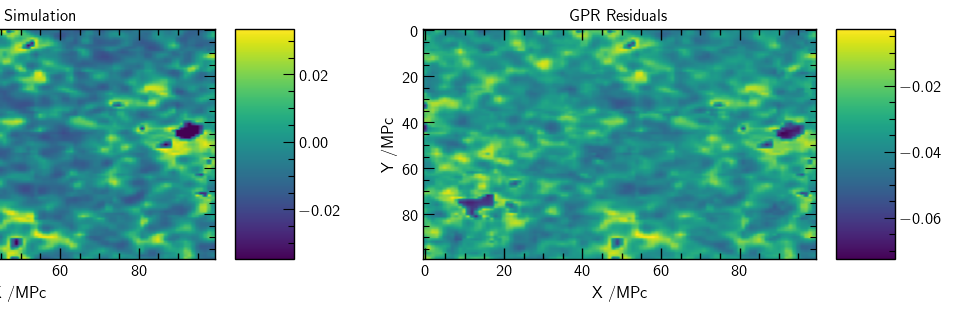

In [12]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(1,2,1)
im = ax.imshow(_21cm[:,:,50])
ax.set_xlabel('X /MPc')
ax.set_ylabel('Y /MPc')
ax.set_title('21cm Simulation')
fig.colorbar(im, ax=ax)
clim = im.properties()['clim']
ax = fig.add_subplot(1,2,2)
im = ax.imshow(resids_gpr[:,:,50])
ax.set_xlabel('X /MPc')
ax.set_ylabel('Y /MPc')
ax.set_title('GPR Residuals')
fig.colorbar(im, ax=ax)



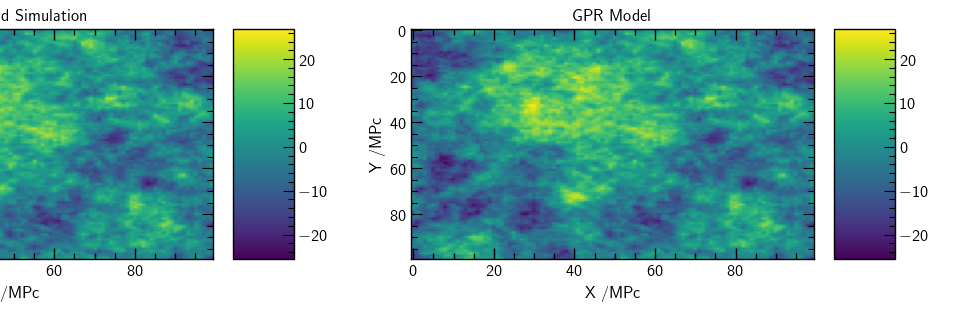

In [13]:

fig = plt.figure(figsize=(12,3))
ax=fig.add_subplot(1,2,1)
im = ax.imshow(total_fg[:,:,50])
ax.set_xlabel('X /MPc')
ax.set_ylabel('Y /MPc')
ax.set_title('Foreground Simulation')
fig.colorbar(im, ax=ax)
clim = im.properties()['clim']
ax = fig.add_subplot(1,2,2)
im = ax.imshow(model_gpr[:,:,50],clim=clim)
ax.set_xlabel('X /MPc')
ax.set_ylabel('Y /MPc')
ax.set_title('GPR Model')
fig.colorbar(im, ax=ax)
plt.show()